In [74]:
pip install -q mediapipe==0.10.0

Note: you may need to restart the kernel to use updated packages.


In [1]:
import urllib

IMAGE_FILENAMES = ['202306150933017606_l.jpg']

# for name in IMAGE_FILENAMES:
#     url = f'https://storage.googleapis.com/mediapipe-assets/{name}'
#     urllib.request.urlretrieve(url, name)

In [10]:
import cv2
#from google.colab.patches import cv2_imshow
import math
import matplotlib.pyplot as plt


DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480

def resize_and_show(image):
    h, w = image.shape[:2]
    if h < w:
        img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
    else:
        img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
#     cv2.imshow('', img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

202306150933017606_l.jpg


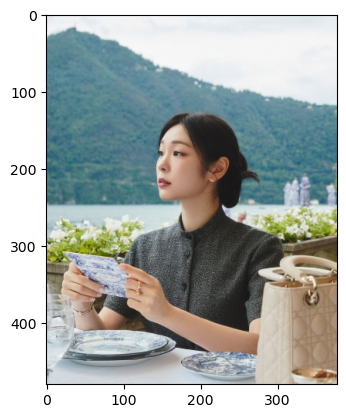

In [11]:
images = {name: cv2.imread(name) for name in IMAGE_FILENAMES}
for name, image in images.items():
    print(name)
    resize_and_show(image)

Segmentation mask of 202306150933017606_l.jpg:


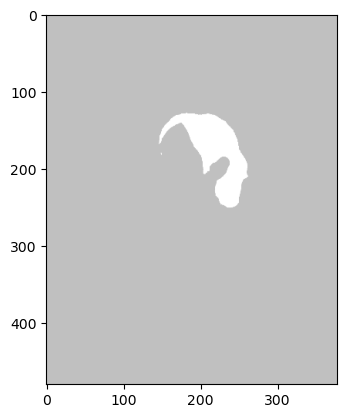

In [12]:
import numpy as np
import mediapipe as mp

from mediapipe.tasks import python
from mediapipe.tasks.python import vision

BG_COLOR = (192, 192, 192)
MASK_COLOR =(255, 255, 255)

base_options = python.BaseOptions(model_asset_path='hair_segmenter.tflite')
options = vision.ImageSegmenterOptions(base_options=base_options,
                                       output_category_mask=True)

with vision.ImageSegmenter.create_from_options(options) as segmenter:
    
    for image_file_name in IMAGE_FILENAMES:
        
        image = mp.Image.create_from_file(image_file_name)
        
        segmentation_result = segmenter.segment(image)
        category_mask = segmentation_result.category_mask
        
        image_data = image.numpy_view()
        fg_image = np.zeros(image_data.shape, dtype=np.uint8)
        fg_image[:] = MASK_COLOR
        bg_image = np.zeros(image_data.shape, dtype=np.uint8)
        bg_image[:] = BG_COLOR
        
        condition = np.stack((category_mask.numpy_view(),) * 3, axis=-1) > 0.2
        output_image = np.where(condition, fg_image, bg_image)
        
        print(f'Segmentation mask of {name}:')
        resize_and_show(output_image)

Blurred background of 202306150933017606_l.jpg:


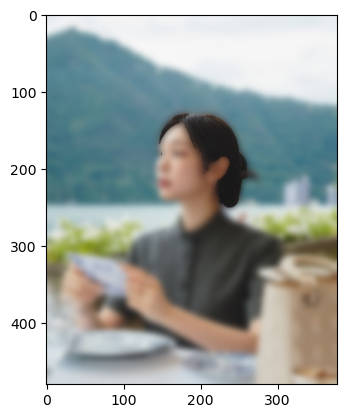

In [13]:
with python.vision.ImageSegmenter.create_from_options(options) as segmenter:
    for image_file_name in IMAGE_FILENAMES:
        image = mp.Image.create_from_file(image_file_name)
        
        segmentation_result = segmenter.segment(image)
        category_mask = segmentation_result.category_mask
        
        image_data = cv2.cvtColor(image.numpy_view(), cv2.COLOR_BGR2RGB)
        
        blurred_image = cv2.GaussianBlur(image_data,(55, 55),0)
        condition = np.stack((category_mask.numpy_view(),)*3, axis=-1) > 0.1
        output_image=np.where(condition, image_data, blurred_image)
        
        print(f'Blurred background of {image_file_name}:')
        resize_and_show(output_image)